In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.collections import LineCollection
from sklearn.isotonic import IsotonicRegression

# load data set

In [3]:
df = pd.read_csv('data_files/iris_data.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# fit model to the data

In [4]:
ir = IsotonicRegression()

x = np.array(df[df.columns[2]])
y = np.array(df[df.columns[3]])

x = np.sort(x)
y = np.sort(y)

print(x)

transformed = ir.fit_transform(x, y)

[1.  1.1 1.2 1.2 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.4 1.4 1.4 1.4 1.4 1.4 1.4
 1.4 1.4 1.4 1.4 1.4 1.4 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5
 1.5 1.6 1.6 1.6 1.6 1.6 1.6 1.6 1.7 1.7 1.7 1.7 1.9 1.9 3.  3.3 3.3 3.5
 3.5 3.6 3.7 3.8 3.9 3.9 3.9 4.  4.  4.  4.  4.  4.1 4.1 4.1 4.2 4.2 4.2
 4.2 4.3 4.3 4.4 4.4 4.4 4.4 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.5 4.6 4.6 4.6
 4.7 4.7 4.7 4.7 4.7 4.8 4.8 4.8 4.8 4.9 4.9 4.9 4.9 4.9 5.  5.  5.  5.
 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.1 5.2 5.2 5.3 5.3 5.4 5.4 5.5 5.5 5.5 5.6
 5.6 5.6 5.6 5.6 5.6 5.7 5.7 5.7 5.8 5.8 5.8 5.9 5.9 6.  6.  6.1 6.1 6.1
 6.3 6.4 6.6 6.7 6.7 6.9]


# plot the data

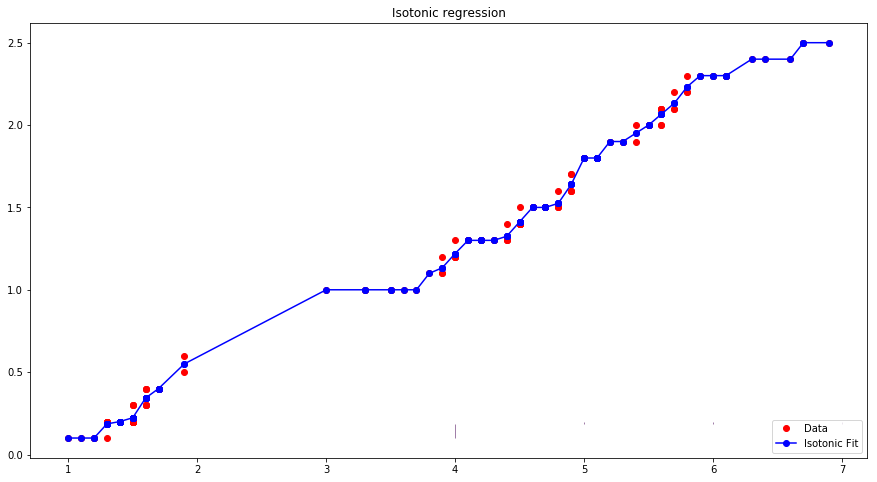

In [5]:
n = len(x)
segments = [[[i, y[i]], [i, transformed[i]]] for i in range(n)]
lc = LineCollection(segments, zorder=0)
lc.set_array(np.ones(len(y)))
lc.set_linewidths(np.full(n, 0.5))

fig = plt.figure(figsize=(15,8))
plt.plot(x, y, 'r.', markersize=12)
plt.plot(x, transformed, 'b.-', markersize=12)
plt.gca().add_collection(lc)
plt.legend(('Data', 'Isotonic Fit'), loc='lower right')
plt.title('Isotonic regression')
plt.show()

# make predictions

In [6]:
pred = ir.predict([3.5])
pred

array([1.])